In [1]:
#importing Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Reading data
data=pd.read_excel("C:\\Users\\adarsh\\Downloads\\R\\PiZZA data.xlsx")

# Data Preprocessing

In [16]:
data.head()

,Crust,Coke,Bread,Delivery(time)
0,0,1,1,14
1,1,1,0,21
2,0,0,0,18
3,0,0,1,17
4,1,0,0,19


In [17]:
data.shape

(16, 4)

There are 16row and 4colomms where rows represent instances and coloums are attributes

In [18]:
#checking the missing values
pd.isnull(data).sum()

Crust             0
Coke              0
Bread             0
Delivery(time)    0
dtype: int64

In [19]:
data.describe()

,Crust,Coke,Bread,Delivery(time)
count,16.000000,16.000000,16.000000,16.000000
mean,0.500000,0.500000,0.500000,18.312500
std,0.516398,0.516398,0.516398,2.023817
min,0.000000,0.000000,0.000000,14.000000
25%,0.000000,0.000000,0.000000,17.000000
50%,0.500000,0.500000,0.500000,18.500000
75%,1.000000,1.000000,1.000000,19.250000
max,1.000000,1.000000,1.000000,22.000000


In [25]:
#checking the data types as delivery time must be int or float.
data.dtypes

Crust             int64
Coke              int64
Bread             int64
Delivery(time)    int64
dtype: object

In [26]:
#Crust is present then YES otherwise NO: 1 represented as Yes and 0 represented as NO 
data['Crust'].value_counts()

1    8
0    8
Name: Crust, dtype: int64

In [27]:
#Coke is present then YES otherwise NO: 1 represented as Yes and 0 represented as NO 
data['Coke'].value_counts()

1    8
0    8
Name: Coke, dtype: int64

In [28]:
#Bread is present then YES otherwise NO: 1 represented as Yes and 0 represented as NO 
data['Bread'].value_counts()

1    8
0    8
Name: Bread, dtype: int64

(array([1., 0., 2., 2., 0., 3., 4., 2., 1., 1.]),
 array([14. , 14.8, 15.6, 16.4, 17.2, 18. , 18.8, 19.6, 20.4, 21.2, 22. ]),
 <a list of 10 Patch objects>)

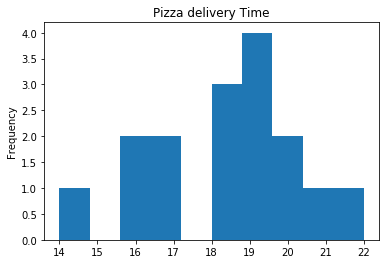

In [30]:
#plt.xlabel('Time')
d=data['Delivery(time)']
plt.ylabel('Frequency')
plt.title('Pizza delivery Time')
plt.hist(d)

#Most of time delivery takes 19 min

# Defining the dependent and independent varible

x = data[['Crust','Coke','Bread']]
y = data['Delivery(time)']
x = pd.get_dummies(data=x, drop_first=True)

In [21]:
#seperating independent and dependent variables
x = data.drop(['Delivery(time)'], axis=1)
y = data['Delivery(time)']
x.shape, y.shape

((16, 3), (16,))

In [23]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [24]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

# Using regression model

In [7]:
# Creating instance of Linear Regresssion
lr = LR()
# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 1.058922558922559


In [9]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     1.0732323232323226


In [10]:
lr.coef_
#coefficient of model: y=ax1+bx2+cx3 y is dependent variable and x1,x2,x3 are independent varibles a,b,c are coefficents that implies 
#how y depends on value of x

array([ 1.83838384,  0.16161616, -2.50505051])

Text(0.5, 1.0, 'Coefficient plot')

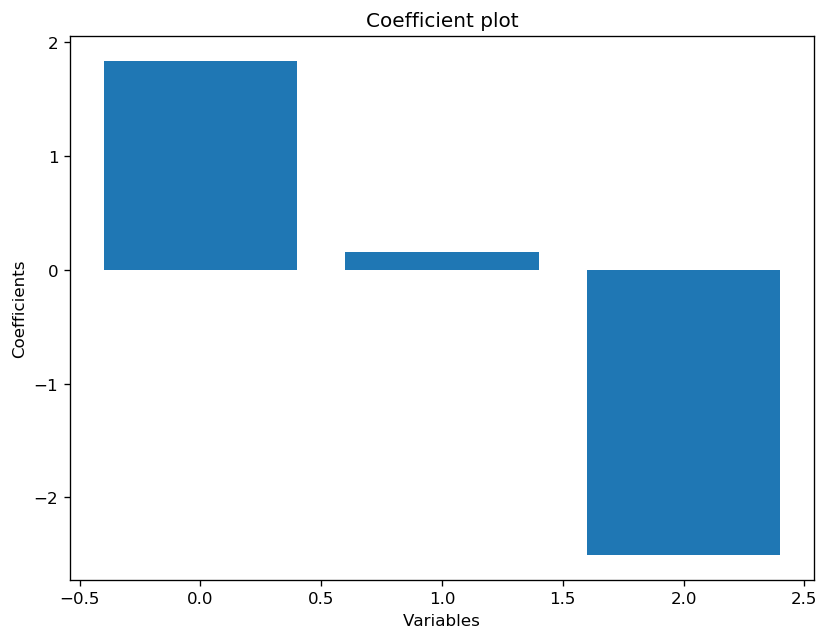

In [11]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')
#Crust and coke have positive relation with delivery time and bread is having negative relation with delivery time

In [12]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()
# residuals column here represents distance b/w data set and prediction or difference b/w test data and predictions

,fitted values,predicted values,residuals
8,16,18.898990,-2.898990
13,16,16.393939,-0.393939
15,18,18.232323,-0.232323
3,17,16.232323,0.767677


plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,2131)
k = [0 for i in range(0,2131)]
plt.scatter( f, residuals.residuals[:], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000, 4000)
plt.legend()

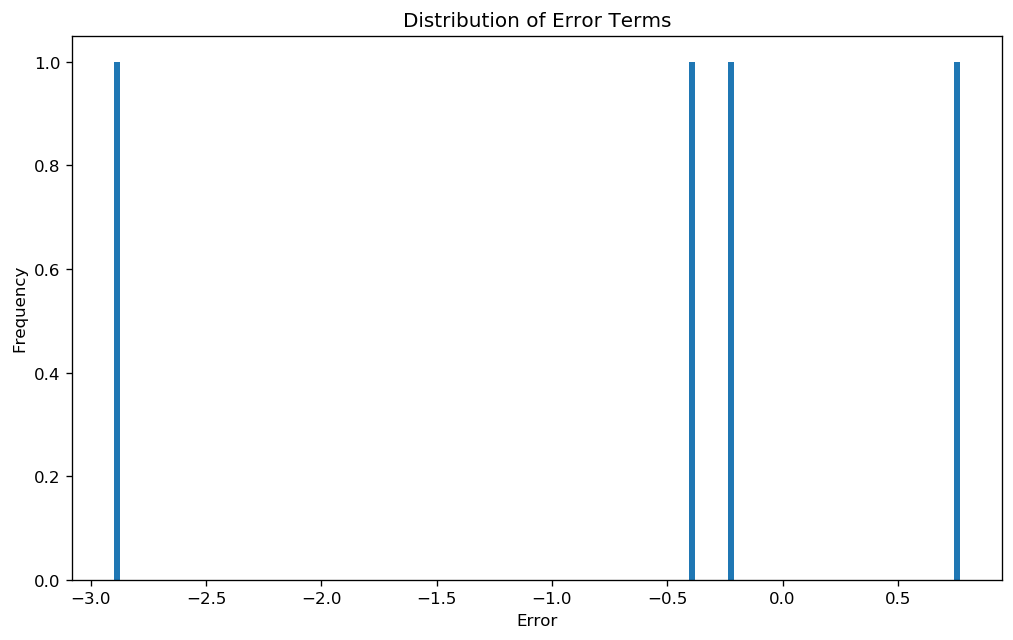

In [14]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

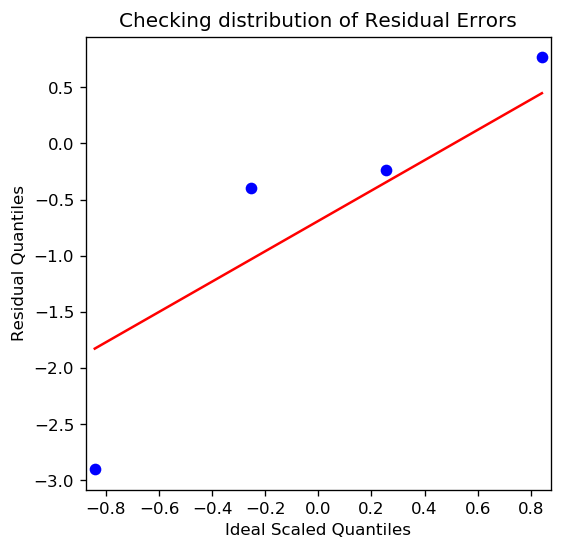

In [15]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()